In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def calc_cap_siso(snr_dB):
    snr_linear = 10 ** (snr_dB / 10) #anti log of snr_db
    capacity = np.log2(1 + snr_linear) #log2(1 + snr)
    return capacity

In [18]:
def calc_cap_simo(snr_dB, num_rec_antennas):
    snr_linear = 10 ** (snr_dB / 10)
    capacity = np.log2(1 + num_rec_antennas * snr_linear)
    return capacity

In [19]:
def calc_cap_miso(snr_dB, num_tran_antennas):
    snr_linear = 10 ** (snr_dB / 10)
    capacity = np.log2(1 + num_tran_antennas * snr_linear)
    return capacity

In [20]:
def calc_cap_mimo(snr_dB, num_tran_antennas, num_rec_antennas):
    snr_linear = 10 ** (snr_dB / 10)
    min_antennas = min(num_tran_antennas, num_rec_antennas)
    capacity = min_antennas * np.log2(1 + snr_linear)
    return capacity

In [21]:
snr_dB_range = np.arange(0, 50, 10)

In [22]:
siso_cap = [calc_cap_siso(snr) for snr in snr_dB_range]
simo_cap = [calc_cap_simo(snr, num_rec_antennas = 2) for snr in snr_dB_range]
miso_cap = [calc_cap_miso(snr, num_tran_antennas = 2) for snr in snr_dB_range]
mimo_cap = [calc_cap_mimo(snr, num_tran_antennas = 2, num_rec_antennas = 2) for snr in snr_dB_range]

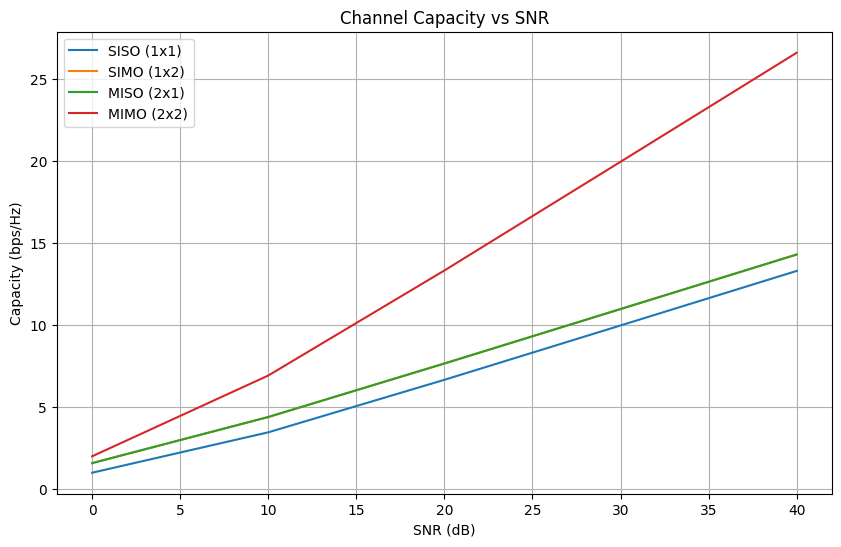

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(snr_dB_range, siso_cap, label='SISO (1x1)')
plt.plot(snr_dB_range, simo_cap, label='SIMO (1x2)')
plt.plot(snr_dB_range, miso_cap, label='MISO (2x1)')
plt.plot(snr_dB_range, mimo_cap, label='MIMO (2x2)')
plt.xlabel('SNR (dB)')
plt.ylabel('Capacity (bps/Hz)')
plt.title('Channel Capacity vs SNR')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
SNR = list(range(0, 51, 5))
m_values = list(range(2, 11))

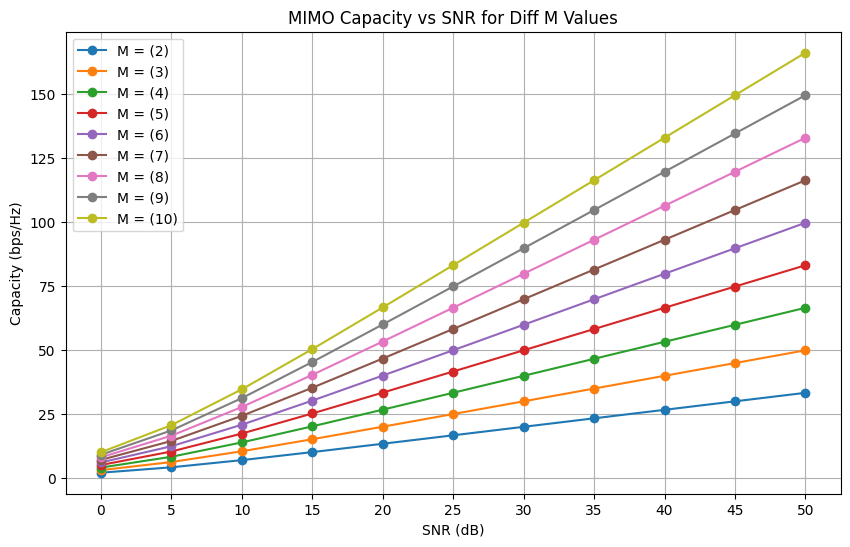

In [30]:
# Calculate and plot capacity for each M
plt.figure(figsize=(10, 6))

for M in m_values:
    cap_mimo = [calc_cap_mimo(snr, M, M) for snr in SNR]
    plt.plot(SNR, cap_mimo, label=f'M = ({M})', marker='o')

plt.title('MIMO Capacity vs SNR for Diff M Values')
plt.xlabel('SNR (dB)')
plt.ylabel('Capacity (bps/Hz)')
plt.grid(True)
plt.legend()
plt.xticks(SNR)
plt.show()